In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
data =pd.read_csv('mpg.csv') #Importing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [3]:
df=data.drop(['name'],axis=1) #Droppping the 'name' column as it is not a predictive attribte 

In [4]:
#Through Excel analysis, 6 values of 'horsepower' were found to have '?' as value. Replacing them with NaN
df[df['horsepower']=='?']=np.nan 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null float64
displacement    392 non-null float64
horsepower      392 non-null object
weight          392 non-null float64
acceleration    392 non-null float64
model_year      392 non-null float64
origin          392 non-null float64
dtypes: float64(7), object(1)
memory usage: 25.0+ KB


In [6]:
df['horsepower']=df['horsepower'].astype(float) #conveting object type 'horsepower' to float type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null float64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model_year      392 non-null float64
origin          392 non-null float64
dtypes: float64(8)
memory usage: 25.0 KB


In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


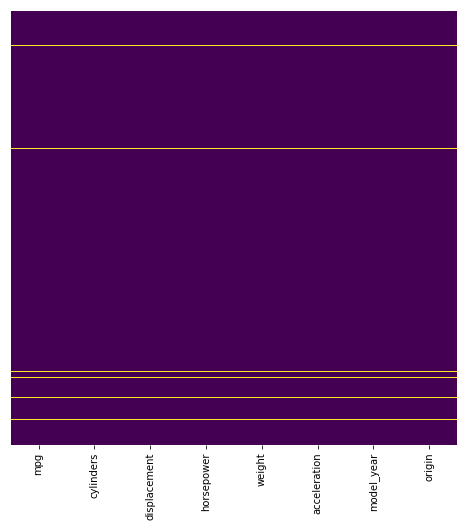

In [69]:
#Heatmap showing the missing values
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [9]:
#df1 contains 392 entries as rows containing missing values are dropped
df1=df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null float64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model_year      392 non-null float64
origin          392 non-null float64
dtypes: float64(8)
memory usage: 27.6 KB


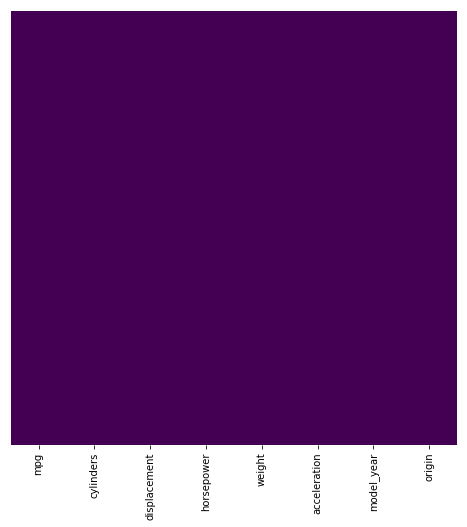

In [70]:
#heatmap shows that there are no more missing values
plt.figure(figsize=(8,8))
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
#df2 contains 398 entries as missing values data is filled with mean
df2=df.fillna(df.mean())
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null float64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null float64
origin          398 non-null float64
dtypes: float64(8)
memory usage: 25.0 KB


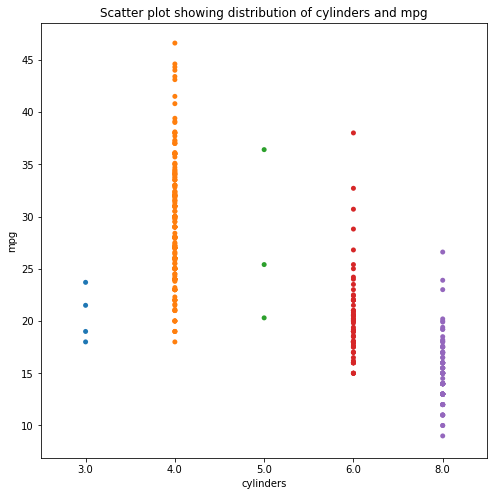

In [45]:
#Scatter plot showing distribution of cylinders and mpg.
plt.figure(figsize=(8,8))
sns.stripplot(x='cylinders',y='mpg',data=df)
plt.title('Scatter plot showing distribution of cylinders and mpg')
plt.show()

Text(0.5,1,'stripplot showing modelyear vs mpg colored by origin')

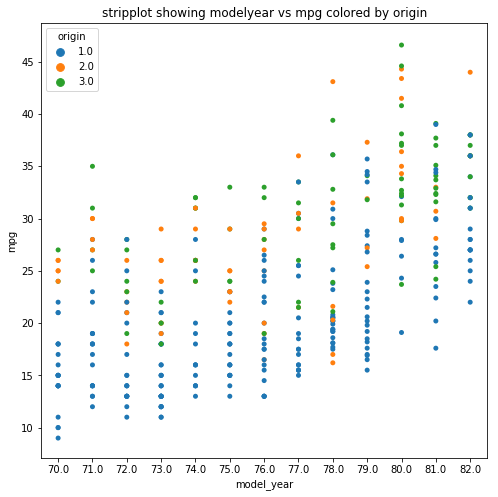

In [44]:
#stripplot showing modelyear vs mpg colored by origin
plt.figure(figsize=(8,8))
sns.stripplot(x='model_year',y='mpg',hue='origin',data=df1)
plt.title('stripplot showing modelyear vs mpg colored by origin')

Text(0.5,1,'plot showing the distribution of weight vs mpg')

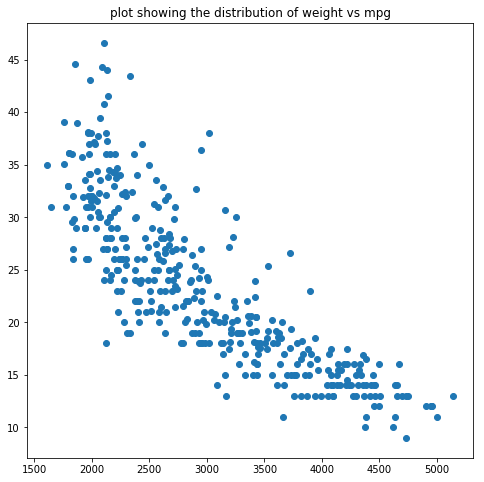

In [57]:
#plot showing the distribution of weight vs mpg
plt.figure(figsize=(8,8))
plt.scatter('weight','mpg',data=df)
plt.title('plot showing the distribution of weight vs mpg')


Text(0.5,1,'plot showing variatoion of mpg across years')

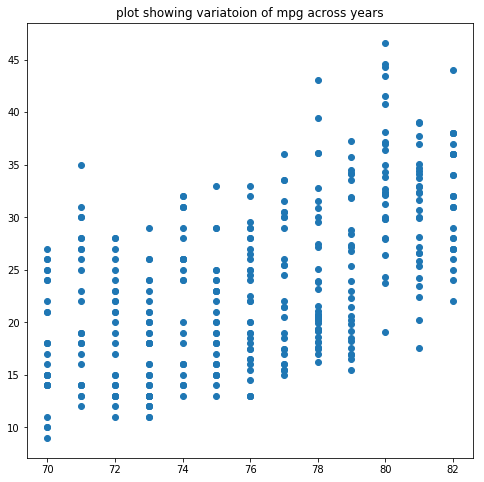

In [58]:
#plot showing variatoion of mpg across years
plt.figure(figsize=(8,8))
plt.scatter('model_year','mpg',data=df)
plt.title('plot showing variatoion of mpg across years')

Text(0.5,1,'Scatter plot of horsepower and mpg')

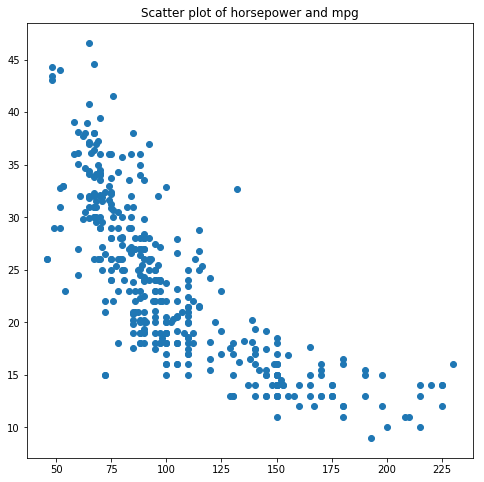

In [60]:
#Scatter plot of horsepower and mpg
plt.figure(figsize=(8,8))
plt.scatter('horsepower','mpg',data=df)
plt.title('Scatter plot of horsepower and mpg')

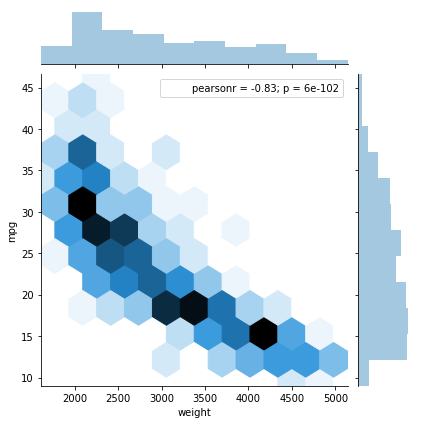

In [31]:
#Jointplot of weight vs mpg
plt.figure(figsize=(8,8))
sns.jointplot(x='weight',y='mpg',data=df,kind='hex')

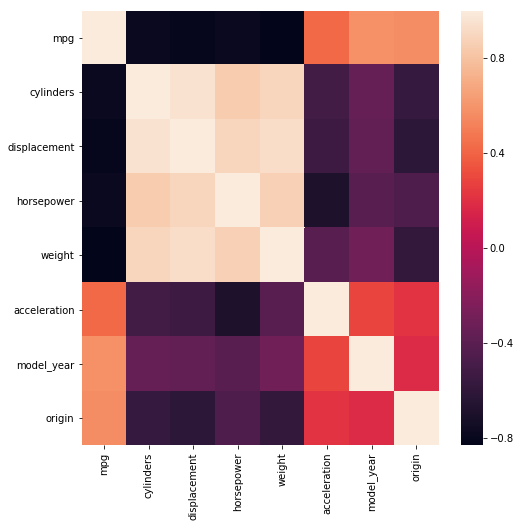

In [64]:
# correlation heatmap of df1 dataset 
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr())

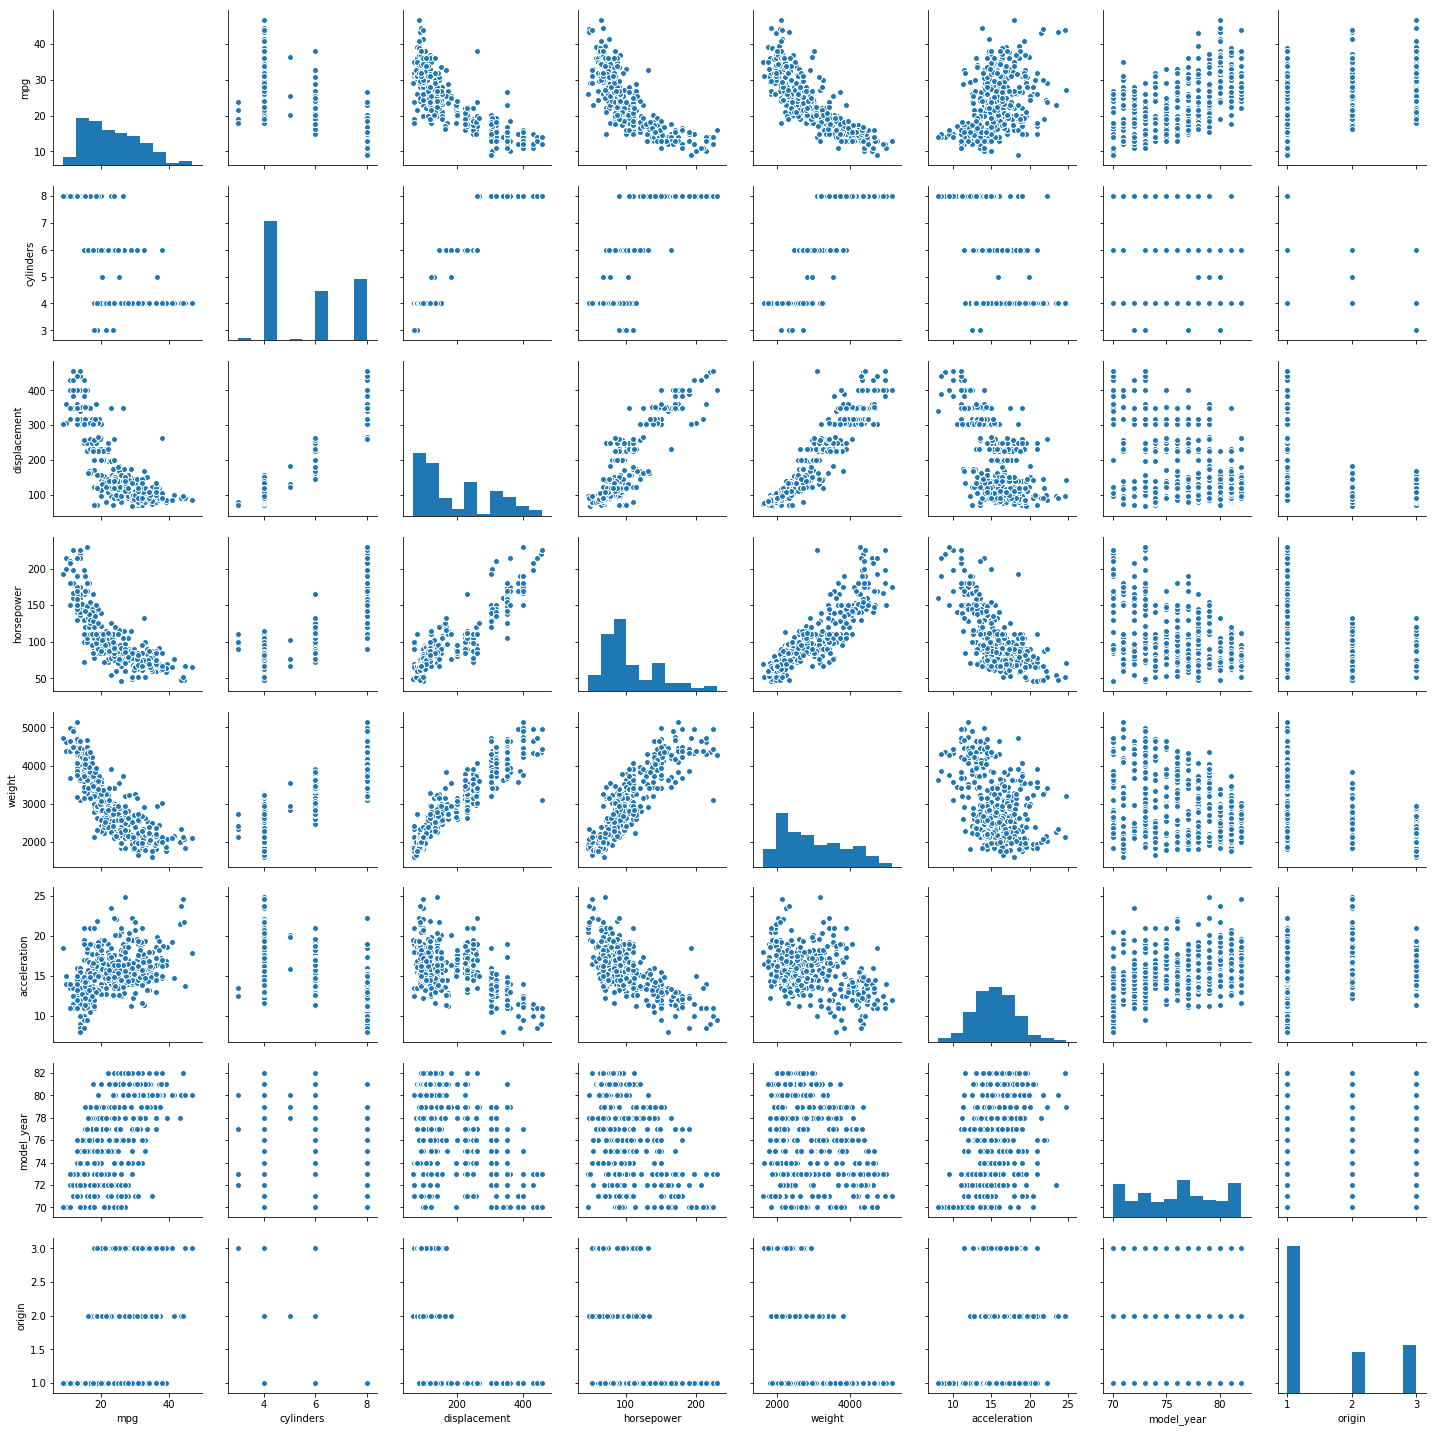

In [17]:
#pairplot of df1 dataset
sns.pairplot(df1)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [20]:
#Linear regression on df1 dataset
y1=df1['mpg']
X1=df1.drop('mpg',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=100)
model1=LinearRegression()
model1.fit(X_train,y_train)
y1_pred=model1.predict(X_test)
r2_score(y_test,y1_pred)

0.7997486706042077

In [21]:
#Linear regression with cross validation on df1 dataset
model2 = LinearRegression()
scores = cross_val_score(model2, X1, y1, cv=10)
scores.mean()

0.6426040546895859

In [22]:
#Linear regression on df2 dataset
y2=df2['mpg']
X2=df2.drop('mpg',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=100)
from sklearn.linear_model import LinearRegression
model3=LinearRegression()
model3.fit(X_train,y_train)
y2_pred=model3.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y2_pred)

0.8333054758449949

In [23]:
#Linear regression with cross validation on df2 dataset
model4 = LinearRegression()
scores = cross_val_score(model4, X2, y2, cv=10)
scores.mean()

0.651365567497974

In [61]:
#df3 is a dataset in which the missing values are replaced by median
##Linear regression on df3 dataset
df3=df.fillna(df.median())
y3=df3['mpg']
X3=df3.drop('mpg',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=100)
from sklearn.linear_model import LinearRegression
model5=LinearRegression()
model5.fit(X_train,y_train)
y3_pred=model5.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y2_pred)

0.8332643546627456

In [62]:
#Linear regression with cross validation on df3 dataset
model6 = LinearRegression()
scores = cross_val_score(model6, X3, y3, cv=10)
scores.mean()

0.6531471890213958

In [68]:
coeff_df = pd.DataFrame(model5.coef_,X3.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cylinders,-0.465569
displacement,0.022085
horsepower,-0.023758
weight,-0.006499
acceleration,0.040806
model_year,0.758273
origin,1.505325


## Findings:
#### 1. There is big difference in r2 score of df1 and df2,df3(~0.04) in ordinary regression suggesting that the missing values have a high impact.
#### 2. WIth cross validation, r2 scores for the 3 datasets(0.642,0.651 &0.653) there is better generalization of the model.
#### 3.Of the three datasets(dropped null values, null values replaced by mean and null values replaced by median), 3rd dataset gives the best r2 score of 0.6531.
#### 4. With the experimentation done above, it can be concluded that a crossvalidation model with missing values replaced by median gives the best model.
